## Ejemplos de preparación de datos para una RNN

### Predicción del valor de la acción de una empresa

Predecir el valor de las acciones de una compañia.
- Se utilizarán las 5 observaciones anteriores 
- Tenemos los datos de 138 días
- ¿Cuanto vale N, T, D?

In [2]:
import numpy as np
from matplotlib import pyplot as plt
apple_stock = np.loadtxt('https://github.com/deeplearning-itba/12-RNN/raw/master/apple/apple_prices.csv')
plt.plot(apple_stock)
plt.show()
print(len(apple_stock))

<Figure size 640x480 with 1 Axes>

138


In [3]:
!wget https://github.com/deeplearning-itba/12-RNN/raw/master/RNN_utils.py

--2019-11-14 09:21:01--  https://github.com/deeplearning-itba/12-RNN/raw/master/RNN_utils.py
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/deeplearning-itba/12-RNN/master/RNN_utils.py [following]
--2019-11-14 09:21:01--  https://raw.githubusercontent.com/deeplearning-itba/12-RNN/master/RNN_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.192.133, 151.101.128.133, 151.101.64.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.192.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974 (3,9K) [text/plain]
Saving to: ‘RNN_utils.py.1’

RNN_utils.py.1      100%[===================>]   3,88K  --.-KB/s    in 0s      

2019-11-14 09:21:02 (59,5 MB/s) - ‘RNN_utils.py.1’ saved [3974/3974]



In [4]:
from RNN_utils import window_transform_series
X_, y = window_transform_series(apple_stock, 5)

Using TensorFlow backend.


In [5]:
print(X_.shape)
print(X_[0:10,:])

(133, 5)
[[590.140015 572.800049 525.339966 521.900024 528.02002 ]
 [572.800049 525.339966 521.900024 528.02002  539.230042]
 [525.339966 521.900024 528.02002  539.230042 538.420044]
 [521.900024 528.02002  539.230042 538.420044 527.699951]
 [528.02002  539.230042 538.420044 527.699951 528.360046]
 [539.230042 538.420044 527.699951 528.360046 523.419983]
 [538.420044 527.699951 528.360046 523.419983 523.150024]
 [527.699951 528.360046 523.419983 523.150024 546.      ]
 [528.360046 523.419983 523.150024 546.       518.659973]
 [523.419983 523.150024 546.       518.659973 502.610016]]


In [6]:
# Parece un detalle pero las capas recurrentes en Keras exigen este formato
X = X_.reshape(X_.shape[0], X_.shape[1], 1) 

In [7]:
print('(N, T, D):')
print(X.shape)

(N, T, D):
(133, 5, 1)


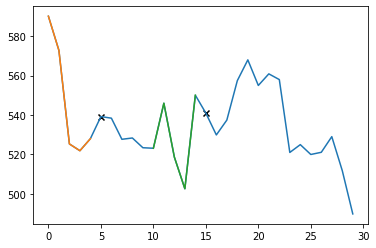

In [8]:
plt.plot(apple_stock[:30])
i1 = 0
plt.plot(range(i1,i1+5),X_[i1])
plt.scatter(i1+5, y[i1], marker='x', color='k')
i1 = 10
plt.plot(range(i1,i1+5),X_[i1])
plt.scatter(i1+5, y[i1], marker='x', color='k')

plt.show()

### SimpleRNN + Dense para stock prices

In [10]:
from keras.layers import SimpleRNN, Dense
from keras.models import Sequential
window_size = 40
rnn_cells = 10
model_rnn = Sequential()
model_rnn.add(SimpleRNN(rnn_cells, input_shape = (window_size,1)))
model_rnn.add(Dense(1))
model_rnn.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


Observaciones:
- Capa densa. Que función de activación estamos usando?

## Un error común

In [11]:
model_rnn_error = Sequential()
model_rnn_error.add(SimpleRNN(rnn_cells, input_shape = (1,window_size)))
model_rnn_error.add(Dense(1))
model_rnn_error.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 10)                510       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


Preguntas:
- Que diferencia hay con la anterior?
- Por que la diferencia en cantidad de parámetros?
- Se puede pensar como un FNN (MLP)?

## FFN (MLP)

In [12]:
model_fnn = Sequential()
model_fnn.add(Dense(rnn_cells, input_shape=(window_size,) ))
model_fnn.add(Dense(1))
model_fnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                410       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________


In [13]:
print('RNN')
print(model_rnn.layers[0].get_weights()[0].shape)
print(model_rnn.layers[0].get_weights()[1].shape)
print(model_rnn.layers[0].get_weights()[2].shape)
print()
print('RNN common error')
print(model_rnn_error.layers[0].get_weights()[0].shape)
print(model_rnn_error.layers[0].get_weights()[1].shape)
print(model_rnn_error.layers[0].get_weights()[2].shape)
print()
print('MLP')
print(model_fnn.layers[0].get_weights()[0].shape)
print(model_fnn.layers[0].get_weights()[1].shape)

RNN
(1, 10)
(10, 10)
(10,)

RNN common error
(40, 10)
(10, 10)
(10,)

MLP
(40, 10)
(10,)


A partir de un historial de valores de tamaño windows_size, se entrena el próximo valor de la acción.  
Como se podría entrener los ejemplos de STOCK Market y modelo de lenguaje de manera mas eficiente con Many-to-Many?